In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import wandb
api = wandb.Api()
run_ids = [
    "1wpb02dh",
    "mqb2j0y3",
    "2mbi1968",
    "2o7r4f32",
    "2zghy7cs",
    "24ju3o5b",
    "3bu1wts2"
]
df_dict = {
    "run_id":[],
    "State":[],
    "model":[],
    "rigl.const_fan_in":[],
    "rigl.dense_allocation":[],
    "training.seed":[],
    "accuracy":[]
}
entity, project = "condensed-sparsity", "condensed-rigl"
for id in run_ids:
    run = api.run(f"{entity}/{project}/{id}")
    summary = run.summary
    config = run.config
    df_dict["run_id"].append(id)
    df_dict["State"].append(run.state)
    df_dict["model"].append(config["model"]["name"])
    df_dict["rigl.const_fan_in"].append(config["rigl"]["const_fan_in"])
    df_dict["rigl.dense_allocation"].append(config["rigl"]["dense_allocation"])
    df_dict["training.seed"].append(config["training"]["seed"])
    df_dict["accuracy"].append(summary["accuracy"])
additional_runs = pd.DataFrame(df_dict)

In [3]:
additional_runs

,run_id,State,model,rigl.const_fan_in,rigl.dense_allocation,training.seed,accuracy
0,1wpb02dh,finished,resnet18,True,0.30,6037,0.9530
1,mqb2j0y3,finished,resnet18,True,0.20,7303,0.9537
2,2mbi1968,finished,resnet18,True,0.30,8746,0.9540
3,2o7r4f32,finished,resnet18,True,0.01,6037,0.9147
4,2zghy7cs,finished,resnet18,True,0.01,8746,0.9083
5,24ju3o5b,finished,resnet18,True,0.20,42,0.9491
6,3bu1wts2,finished,resnet18,True,0.20,2078,0.9531


In [4]:
_INDEPENDENT_VARS = [
    "rigl.dense_allocation",
    "rigl.const_fan_in",
    "model",
]

In [5]:
df = pd.read_csv("/home/condensed-sparsity/data/results/wandb_export_2022-06-08T15_49_19.313-06_00.csv")
plt.style.use("../plt_plot_style.mplstyle")

In [6]:
df = pd.concat([df, additional_runs])
df = df.loc[df["State"].isin(["finished", "running"])]


In [7]:
df

,Name,Agent,State,Notes,Created,Runtime,Sweep,dataset,experiment.comment,experiment.name,...,wandb.start_method,paths.base,Learning Rate,acc,epoch,los,loss,new high score,test,run_id
5,wide_resnet22_cifar10_sweep_0.5_False,bd0dcg2j,finished,-,2022-06-08T03:08:39.000Z,17089.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.196530,NaN,NaN,NaN
6,wide_resnet22_cifar10_sweep_0.5_False,4gzb504w,finished,-,2022-06-08T03:08:34.000Z,17126.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.194545,NaN,NaN,NaN
7,wide_resnet22_cifar10_sweep_0.5_False,iwzqfawx,finished,-,2022-06-08T02:58:39.000Z,2709.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.195985,NaN,NaN,NaN
8,wide_resnet22_cifar10_sweep_0.5_False,w9hlspuw,finished,-,2022-06-08T02:47:44.000Z,6191.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.197284,NaN,NaN,NaN
9,wide_resnet22_cifar10_sweep_0.5_False,daalrzlx,finished,-,2022-06-08T02:39:06.000Z,4522.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.195505,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2mbi1968
3,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2o7r4f32
4,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2zghy7cs
5,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24ju3o5b


In [8]:
with open("dict.csv", "w") as handle:
    handle.write(df.to_csv(index=False))

In [13]:
## Style sheet: 
style = """
# Figure properties
figure.figsize: 10, 6 # figure size in inches

# Font properties
font.size: 16 # Size of the font
font.family: sans-serif # Type of Font
font.sans-serif : "DejaVu Sans"


# Axes properties
axes.linewidth: 2  # edge linewidth
axes.labelpad: 8   # space between label and axis
axes.prop_cycle: cycler(color=['00a5bb','f79141','499585', 'd81e52', '6cb2c5' , '6c77c5', 'c5ba6c', '56ce93', 'd88fBf', 'ffd505']) # color cycle for plot lines
axes.titlepad: 20.0    # pad between axes and title in points
axes.labelsize: 16     # Axes labels size
axes.titlesize: 20     # Plot title size
axes.labelweight: 500  # Axel Labels weight
axes.titleweight: 500  # Axel Titleweight
axes.edgecolor: 262626
axes.labelcolor: 262626
axes.titlecolor: 262626

# Tick properties
# x-axis
xtick.direction: inout # direction: in, out, or inout
xtick.major.size: 0 # major tick size in points
xtick.major.width: 0 # major tick width in points
xtick.minor.size: 0 # minor tick size in points
xtick.minor.width: 0 # minor tick width in points
xtick.major.pad : 10
xtick.minor.pad: 10
xtick.labelsize : 16

# y-axis
ytick.direction: inout # direction: in, out, or inout
ytick.major.size: 0 # major tick size in points
ytick.major.width: 0 # major tick width in points
ytick.minor.size: 0 # minor tick size in points
ytick.minor.width: 0 # minor tick width in points
ytick.major.pad : 10
ytick.minor.pad: 10
ytick.labelsize : 16

# Line properties
lines.linewidth: 3.5

# Legend properties
legend.framealpha: 0.8  # opacity of legend frame
legend.frameon: False   # whether or not to draw a frame around legend
legend.fontsize: 14     # Font size of the legend
legend.borderpad : 0
#legend.borderaxespad: 1.5

#Edge Color properties
#patch.force_edgecolor: True #Edge color for the bars
"""
with open("plt_plot_style.mplstyle", "w") as handle:
  handle.write(style)

plt.style.use("./plt_plot_style.mplstyle")

In [10]:
def get_confidence_bounds_df(df: pd.DataFrame, alpha=0.95, target_col:str = "accuracy"):
    df = df.copy()
    df = df.loc[~df[target_col].isna()]
    results = {
        "sparsity":[],
        "mean":[],
        "lower_bound":[],
        "upper_bound":[],
    }
    for sparsity in df["sparsity"].unique():
        this_df = df.loc[df["sparsity"] == sparsity]
        results["sparsity"].append(sparsity)
        results["mean"].append(this_df[target_col].mean())
        lower, upper = st.t.interval(
            alpha=alpha,
            df=len(this_df[target_col])-1,
            loc=this_df[target_col].mean(),
            scale=st.sem(this_df[target_col])
        )
        results["lower_bound"].append(lower)
        results["upper_bound"].append(upper)
    return pd.DataFrame(results)

In [11]:
# df["Mean Accuracy"] = df.groupby(_INDEPENDENT_VARS).mean()["accuracy"].reset_index()
original_df = df.copy()

In [17]:
agg_results

,sparsity,mean,lower_bound,upper_bound
0,0.50,0.95336,0.951517,0.955203
1,0.60,0.95276,0.950768,0.954752
2,0.70,0.95294,0.951054,0.954826
3,0.80,0.95198,0.949505,0.954455
4,0.90,0.94742,0.946006,0.948834
5,0.95,0.94172,0.938016,0.945424


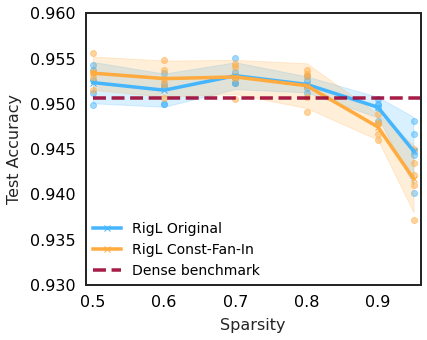

In [30]:
_MODEL = "resnet18"
_PLOT_99_SPARSITY= False

plot_df = df.copy()
plot_df = plot_df.loc[plot_df["State"] == "finished"]
if not _PLOT_99_SPARSITY:
  plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
plot_df = plot_df.loc[plot_df["model"] == _MODEL]
plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
plot_dfs = []
fig, ax = plt.subplots(figsize=(6,5))
colors = ['#45b6fe','#ffab40','#9c0534'] # '#ffab40' '#ff671f'

table_df = {
    "sparsity":[],
    "method":[],
    "lower_bound":[],
    "upper_bound":[],
    "+/-":[]
}

for idx, fan_in in enumerate(plot_df["rigl.const_fan_in"].unique()):
    df_slice = plot_df.loc[plot_df["rigl.const_fan_in"] == fan_in]
    if fan_in:
        name = "RigL Const-Fan-In"
    else:
        name = "RigL Original"
    agg_results = get_confidence_bounds_df(df_slice)
    agg_results["method"] = [name]*len(agg_results)
    agg_results["+/-"] = 100*(agg_results["mean"]-agg_results["lower_bound"])
    ax.plot(
        agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=colors[idx], alpha=1.0
    )
    ax.fill_between(
        agg_results["sparsity"],
        agg_results["upper_bound"],
        agg_results["lower_bound"],
        color=colors[idx],
        alpha=0.20)
    ax.scatter(
        df_slice["sparsity"], df_slice["accuracy"], marker='o', color=colors[idx], alpha=0.5
    )
_BENCHMARK_VALUE = 0.9506
ax.plot([0.5, 1.0], [_BENCHMARK_VALUE, _BENCHMARK_VALUE], "--",  label="Dense benchmark", color=colors[2], alpha=0.9)
model_name_dict = dict(
    resnet18="ResNet18",
    wide_resnet22="WideResNet22"
)
#plt.title(f"{model_name_dict[_MODEL]} CIFAR-10 Validation Set Accuracy vs. Sparsity")
plt.xlabel('Sparsity')
plt.ylabel('Test Accuracy')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
if not _PLOT_99_SPARSITY:
  ax.set_ylim([0.93,0.96])
  ax.set_xlim([0.49,.96])
else:
  ax.set_ylim([0.9,1.0])
  ax.set_xlim([0.49,1.0])
plt.show()

fig.savefig("resnet_cifar_results.png", dpi=600, bbox_inches="tight")
fig.savefig("Experiment.svg",format="svg", bbox_inches="tight")

In [31]:
agg_results

,sparsity,mean,lower_bound,upper_bound,method,+/-
0,0.50,0.95336,0.951517,0.955203,RigL Const-Fan-In,0.184294
1,0.60,0.95276,0.950768,0.954752,RigL Const-Fan-In,0.199170
2,0.70,0.95294,0.951054,0.954826,RigL Const-Fan-In,0.188635
3,0.80,0.95198,0.949505,0.954455,RigL Const-Fan-In,0.247462
4,0.90,0.94742,0.946006,0.948834,RigL Const-Fan-In,0.141408
5,0.95,0.94172,0.938016,0.945424,RigL Const-Fan-In,0.370362


In [22]:
agg_results["upper_bound"]-agg_results["mean"]

0    0.001843
1    0.001992
2    0.001886
3    0.002475
4    0.001414
5    0.003704
dtype: float64

In [104]:
_MODEL = "resnet18"
# _MODEL = "wide_resnet22"
plot_df = mean.reset_index()
plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
plot_df = plot_df.loc[plot_df["model"] == _MODEL]
plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
plot_dfs = []

fig = go.Figure()

for fan_in in plot_df["rigl.const_fan_in"].unique():
    df = plot_df.loc[plot_df["rigl.const_fan_in"] == fan_in]
    if fan_in:
        name = "RigL with Constant Fan In"
    else:
        name = "RigL Original"
    fig.add_trace(
        go.Scatter(x=df["sparsity"], y=df.accuracy, name=name)
    )

_BENCHMARK_VALUE = 0.9506
fig.add_trace(
    go.Scatter(
        y=[_BENCHMARK_VALUE, _BENCHMARK_VALUE ],
        x=[0.5,1.0],
        mode="lines",
        line_dash="dash",
        name = "Dense Benchmark",
        line=dict(color="#3cb589")
    )
)

# fig.add_hline(y=0.9506, line_width=3, line_dash="dash", opacity=0.2, name="Benchmark")
model_name_dict = dict(
    resnet18="ResNet18",
    wide_resnet22="WideResNet22"
)
for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    print(template)
    fig.update_layout(
        template=template,
        title=f"{model_name_dict[_MODEL]} Accuracy vs. Sparsity",
        xaxis_title = "Sparsity",
        yaxis_title = "CIFAR10 Test Accuracy",
        title_x=0.5,
        width=800,
        height=800,
        legend=dict(
            yanchor="bottom",
            y=0.01,
            xanchor="left",
            x=0.01
        ),
        font=dict(
            size=24
        ),
        yaxis_tick0=0.85,
        yaxis_dtick=0.01,
        yaxis_range=(0.92,0.97)
    )
    fig.show()


plotly


plotly_white


plotly_dark


ggplot2


seaborn


simple_white


none
